In [1]:
import joblib
import pandas as pd
import re
import wordcloud as wc
from gensim.parsing.preprocessing import preprocess_string

import pandas as pd
from gensim import corpora, models, parsing
import numpy as np
import copy
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags,strip_punctuation,strip_multiple_whitespaces, strip_numeric,remove_stopwords,strip_short, stem_text

#from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pymorphy2
from pymorphy2 import MorphAnalyzer
import operator
from operator import itemgetter

In [2]:
### GET model ###
model = joblib.load('SGDClassifier_to_ts.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
#### GET DICT ####
loaded_dict = corpora.Dictionary.load('dictionary')

In [10]:
#### GET data #######
data_to_pred = pd.read_excel('./input/14_21_june.xlsx') 

In [13]:
from preproc import pipeline_text_to_norm
from to_vect import as_sparse_matrix


In [26]:
# 1. to_norm
#%%time
texts = data_to_pred['Комментарий к инциденту']
res = pipeline_text_to_norm(texts)

In [18]:
# 2.  TF-IDF по документам
import gensim
corpus = res
lexicon = loaded_dict
tfidf = gensim.models.TfidfModel(dictionary = lexicon, normalize = True)
vectors = [tfidf[lexicon.doc2bow(doc)] for doc in corpus]

In [25]:
#### - вариант обращения содержащий только теги словаря обучения ####
tags_from_dict = []
for i in vectors:
    t = [loaded_dict[x[0]] for x in i]
    tags_from_dict.append(t)
tags_from_dict   

[['web', 'заказ', 'зависнуть'],
 [],
 ['арба', 'регистрация', 'расхождение', 'иметься'],
 ['доставка', 'поставка', 'отгрузить', 'отпуск', 'зависнуть'],
 ['склад', 'открыть'],
 ['доставка', 'склад', 'остаток'],
 ['доставка', 'поставка', 'отгрузить', 'отгрузка', 'web', 'заказ'],
 ['доставка', 'заказ'],
 ['доставка', 'остаток'],
 ['чек'],
 ['поставка', 'отпуск', 'отгрузка', 'склад', 'web', 'заказ', 'веб'],
 ['сторно', 'расхождение', 'чек', 'оплата'],
 ['остаток'],
 ['доставка', 'поставка', 'отгрузить', 'отпуск', 'склад'],
 ['доставка', 'поставка', 'отгрузка', 'заказ', 'назначить'],
 ['арба', 'заказ', 'назначить'],
 ['доставка', 'отгрузить', 'чек'],
 ['заказ'],
 ['отпуск', 'приёмка', 'заказ'],
 ['доставка', 'склад', 'остаток'],
 ['доставка', 'отгрузить', 'отгрузка', 'статус'],
 [],
 ['доставка', 'отгрузить'],
 ['назначить'],
 ['пко', 'рубль', 'рко'],
 ['доставка', 'склад', 'заказ', 'чек'],
 ['доставка', 'зависнуть'],
 ['доставка', 'отгрузка'],
 ['склад', 'прокачаться'],
 [],
 [],
 ['достав

In [19]:
vectors

[[(26, 0.24167167784470764),
  (32, 0.8414119090187749),
  (51, 0.4833433556894153)],
 [],
 [(10, 0.3785678217515),
  (13, 0.43934464646934424),
  (46, 0.686031316757317),
  (78, 0.43934464646934424)],
 [(0, 0.3101784372047165),
  (1, 0.4313004051999909),
  (2, 0.4313004051999909),
  (4, 0.5524223731952653),
  (51, 0.47600291977591686)],
 [(23, 0.586080088207308), (34, 0.8102531272429093)],
 [(0, 0.4465628310828363), (23, 0.5752789445912173), (45, 0.6852997693019437)],
 [(0, 0.15878571230607225),
  (1, 0.22079014477843525),
  (2, 0.22079014477843525),
  (22, 0.5655891545015965),
  (26, 0.4873482719013444),
  (32, 0.5655891545015965)],
 [(0, 0.7468148098854619), (32, 0.6650320591789101)],
 [(0, 0.5459488337480346), (45, 0.8378185190894034)],
 [(59, 1.0)],
 [(1, 0.3610541393102469),
  (4, 0.23122443439075246),
  (22, 0.23122443439075246),
  (23, 0.16725148271200704),
  (26, 0.19923795855137974),
  (32, 0.46244886878150493),
  (85, 0.6936733031722574)],
 [(18, 0.4898279542479427),
  (46, 

In [42]:
# 3. to_vect
test_vec = as_sparse_matrix(loaded_dict,vectors)

In [43]:
# inf
y_pred = model.predict(test_vec)

In [45]:
y_pred[0:100]

array([ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 15, 25,  0,  0, 13,
        0, 24, 29,  0,  0,  0, 24,  0,  0, 24, 17, 25, 15,  0,  0, 13,  0,
        0,  0, 26, 29, 24,  0, 17,  0,  0, 24,  8,  9, 12, 15, 12,  0, 17,
        9,  8,  0,  0,  0,  0,  0, 17, 13, 12, 17, 17,  0,  0, 12,  0, 17,
       16, 17, 17, 17, 15, 22,  0,  0, 14, 17,  0, 17,  0,  0, 29, 18,  0,
        0, 17,  0,  0, 17, 26, 17, 13, 17,  6, 29,  0,  0,  0, 17])

In [ ]:
###### VISUAL TSNE ##########

In [93]:
import numpy as np
from sklearn.manifold import TSNE

X = test_vec
X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X)
X_embedded.shape

(2458, 2)

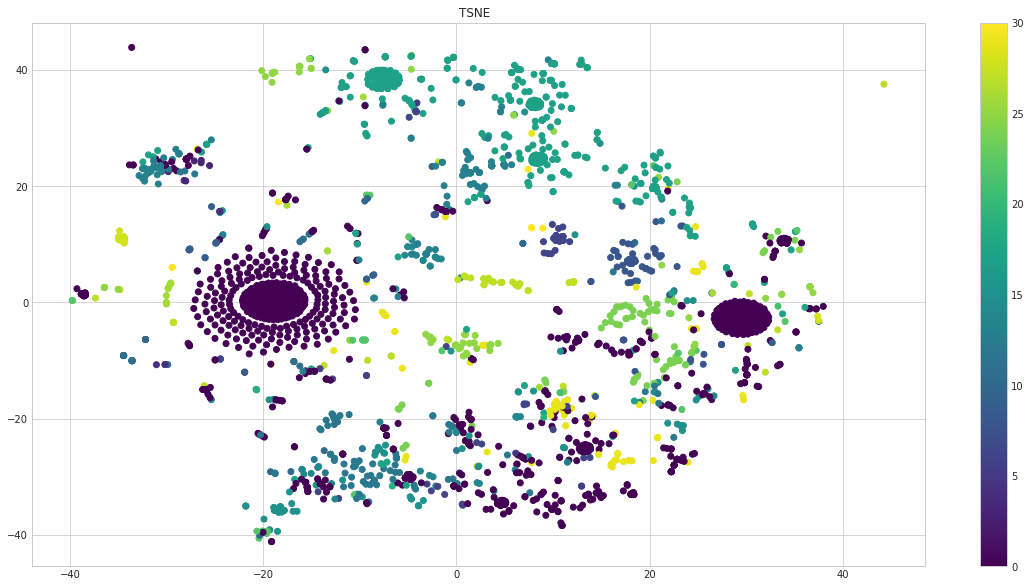

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.style.use('seaborn-whitegrid')
#plt.plot(X_embedded[:,0],X_embedded[:,1], marker = 'o',color = 'g', ls = '')
plt.scatter(X_embedded[:,0],X_embedded[:,1], marker = 'o', c = y_pred.tolist(),cmap='viridis', ls = '-')
plt.title('TSNE  ')
plt.colorbar()

# # # C лейблом
# for x,y,y_test_point in zip(X_embedded[:,0],X_embedded[:,1],y_test):
#     label = "{:.2f}".format(y_test_point)

#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
#### C индексом
# for index,tr in enumerate(zip(X_embedded[:,0],X_embedded[:,1],y_pred)):
#     if tr[2] == 0:
#         #label = "{:.2f}".format(tr[2],index)
#         label = "{:.2f}".format(index)

#         plt.annotate(label, # this is the text
#                  (tr[0],tr[1]), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center